In [ ]:
if (!require("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install

In [1]:
# Instalar y cargar los paquetes necesarios
library(Rsubread)
library(GenomicAlignments)

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: 'S4Vectors'


The following objects are masked from 'package:base':

    expand.grid, I, unname


Loading required package: IRanges


Attaching package: 'IRanges'


The following object is masked from 'package:grDevices':

    windows


Loading required package: GenomeInfoDb

Loading required pa

In [7]:
library(BiocManager)
BiocManager::install('ShortRead')

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.14 (BiocManager 1.30.23), R 4.1.3 (2022-03-10)

Installing package(s) 'ShortRead'

also installing the dependencies 'deldir', 'RcppEigen', 'interp', 'hwriter', 'latticeExtra'





  There are binary versions available but the source versions are later:
             binary    source needs_compilation
deldir        1.0-6     2.0-4              TRUE
RcppEigen 0.3.3.9.3 0.3.4.0.0              TRUE
interp        1.1-4     1.1-6              TRUE

  Binaries will be installed
package 'deldir' successfully unpacked and MD5 sums checked
package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'interp' successfully unpacked and MD5 sums checked
package 'hwriter' successfully unpacked and MD5 sums checked
package 'latticeExtra' successfully unpacked and MD5 sums checked
package 'ShortRead' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\3060\AppData\Local\Temp\Rtmp0ckFhx\downloaded_packages


Old packages: 'boot', 'broom', 'bslib', 'callr', 'codetools', 'crul', 'curl',
  'data.table', 'DBI', 'dbplyr', 'deldir', 'evaluate', 'fontawesome', 'future',
  'future.apply', 'gargle', 'ggplot2', 'glmnet', 'globals', 'googledrive',
  'googlesheets4', 'gtable', 'hardhat', 'highr', 'htmlwidgets', 'httr',
  'interp', 'knitr', 'labeling', 'lava', 'lifecycle', 'listenv', 'locfit',
  'matrixStats', 'munsell', 'openssl', 'prettyunits', 'progress', 'progressr',
  'quantmod', 'RcppArmadillo', 'RcppEigen', 'RCurl', 'recipes', 'rematch',
  'repr', 'reprex', 'RJSONIO', 'rlang', 'rmarkdown', 'RSQLite', 'rstudioapi',
  'rvest', 'scales', 'shape', 'shiny', 'stringr', 'survival', 'tidyselect',
  'tidyverse', 'tiff', 'timeDate', 'tinytex', 'viridisLite', 'withr', 'XML',
  'xml2', 'xts'



In [2]:
# Descargar los archivos fastq desde SRA
fastq_files <- c("SRR17965733.fastq", "SRR17965734.fastq", "SRR17965735.fastq",
                 "SRR17965736.fastq", "SRR17965737.fastq", "SRR17965738.fastq")

In [4]:
library(ShortRead)

# Función para filtrar y recortar lecturas por bloques
filter_and_trim_fastq_block <- function(fastq_file, block_size = 1e6) {
    clean_fastq_file <- paste0(tools::file_path_sans_ext(fastq_file), "_clean.fastq")
    
    # Inicializar archivo de salida
    if (file.exists(clean_fastq_file)) file.remove(clean_fastq_file)
    
    fq_stream <- FastqStreamer(fastq_file, n = block_size)
    on.exit(close(fq_stream))
    
    repeat {
        fq <- yield(fq_stream)
        if (length(fq) == 0) break
        
        # Filtrar por longitud mínima de 20 bases
        fq_filtered <- fq[width(fq) >= 20]
        
        # Filtrar por calidad mínima de 20
        qual <- quality(fq_filtered)
        qual_matrix <- as(qual, "matrix")
        keep <- rowSums(qual_matrix >= 20) == ncol(qual_matrix)
        fq_filtered <- fq_filtered[keep]
        
        # Append filtered reads to the clean fastq file
        writeFastq(fq_filtered, clean_fastq_file, mode = "a")
    }
    
    return(clean_fastq_file)
}

# Aplicar el filtrado y recorte a todos los archivos fastq
clean_fastq_files <- sapply(fastq_files, function(file) {
    filter_and_trim_fastq_block(file)
})

# Ver los archivos FASTQ limpios generados
print(clean_fastq_files)

        SRR17965733.fastq         SRR17965734.fastq         SRR17965735.fastq 
"SRR17965733_clean.fastq" "SRR17965734_clean.fastq" "SRR17965735_clean.fastq" 
        SRR17965736.fastq         SRR17965737.fastq         SRR17965738.fastq 
"SRR17965736_clean.fastq" "SRR17965737_clean.fastq" "SRR17965738_clean.fastq" 


In [4]:
# Construir el índice del genoma de referencia (supongamos que el archivo del genoma es 'hg38.fa')
buildindex(basename="hg38", reference="D:\\Documentos\\Tesis de Grado\\Dseq2\\Lactobacillus acidophilus KLDS1.0901\\GRCh38_latest_genomic.fna\\GRCh38_latest_genomic.fna")


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
       Rsubread 2.8.2

//================================= setting ==================================\\
||                                                                            ||
||                Index name : hg38                                           ||
||               Index space : base space                                     ||
||               Index split : no-split                                       ||
||          Repeat threshold : 100 repeats                                    ||
||              Gapped index : no                    

In [5]:
# Definir el archivo de índice del genoma de referencia
index <- "hg38"

# Alinear las lecturas limpias contra el genoma de referencia (genoma humano) y especificar archivos BAM de salida
bam_files <- paste0(tools::file_path_sans_ext(clean_fastq_files), ".bam")

for (i in seq_along(clean_fastq_files)) {
    align(index=index, readfile1=clean_fastq_files[i], type="rna", nthreads=8, output_file=bam_files[i])
}




        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
       Rsubread 2.8.2

//================================= setting ==================================\\
||                                                                            ||
|| Function      : Read alignment (RNA-Seq)                                   ||
|| Input file    : SRR17965733_clean.fastq                                    ||
|| Output file   : SRR17965733_clean.bam (BAM)                                ||
|| Index name    : hg38                                                       ||
||                                                   

In [2]:
# Instalar el paquete R.utils si no está instalado
if (!requireNamespace("R.utils", quietly = TRUE)) {
  install.packages("R.utils")
}

# Definir la URL y la ruta local para el archivo GTF
gtf_url <- "ftp://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_40/gencode.v40.annotation.gtf.gz"
gtf_file_compressed <- "gencode.v40.annotation.gtf.gz"
gtf_file <- "gencode.v40.annotation.gtf"

# Descargar el archivo GTF
download.file(gtf_url, gtf_file_compressed)

# Descomprimir el archivo GTF
R.utils::gunzip(gtf_file_compressed, destname=gtf_file)

Warning message in download.file(gtf_url, gtf_file_compressed):
"the 'wininet' method is deprecated for ftp:// URLs"


In [7]:
gtf_file <- "GCF_000001405.40_GRCh38.p14_genomic.gtf"
# Visualizar las primeras líneas del archivo GTF
gtf <- read.delim(gtf_file, header = FALSE)
head(gtf, 20)

V1                                                                                                                                                                                                                      
1  #gtf-version 2.2                                                                                                                                                                                                        
2  #!genome-build GRCh38.p14                                                                                                                                                                                               
3  #!genome-build-accession NCBI_Assembly:GCF_000001405.40                                                                                                                                                                 
4  #!annotation-date 10/02/2023                                                                                                                                                                                            
5  #!annotation-source NCBI RefSeq GCF_000001405.40-RS_2023_10                                                                                                                                                             
6  NC_000001.11                                                                                                                                                                                                            
7  BestRefSeq                                                                                                                                                                                                              
8  gene                                                                                                                                                                                                                    
9  11874                                                                                                                                                                                                                   
10 14409                                                                                                                                                                                                                   
11 .                                                                                                                                                                                                                       
12 +                                                                                                                                                                                                                       
13 .                                                                                                                                                                                                                       
14 gene_id DDX11L1; transcript_id ; db_xref GeneID:100287102; db_xref HGNC:HGNC:37102; description DEAD/H-box helicase 11 like 1 (pseudogene); gbkey Gene; gene DDX11L1; gene_biotype transcribed_pseudogene; pseudo true; 
15 NC_000001.11                                                                                                                                                                                                            
16 BestRefSeq                                                                                                                                                                                                              
17 transcript                                                                                                                                                                                                              
18 11874                                   

In [6]:
# Cargar el archivo BAM y visualizar algunos alineamientos
library(Rsamtools)
bam <- scanBam(bam_files[1])
str(bam)

List of 1
 $ :List of 13
  ..$ qname : chr [1:18164011] "SRR17965733.13" "SRR17965733.27" "SRR17965733.81" "SRR17965733.85" ...
  ..$ flag  : int [1:18164011] 16 0 0 0 0 0 16 16 16 0 ...
  ..$ rname : Factor w/ 705 levels "NC_000001.11",..: 53 23 1 1 45 22 29 49 30 376 ...
  ..$ strand: Factor w/ 3 levels "+","-","*": 2 1 1 1 1 1 2 2 2 1 ...
  ..$ pos   : int [1:18164011] 26887193 133020437 151697414 15935067 59028415 108231435 16974756 57688298 47968257 68021 ...
  ..$ qwidth: int [1:18164011] 150 150 150 150 150 150 150 150 150 150 ...
  ..$ mapq  : int [1:18164011] 10 10 40 40 20 40 40 20 40 0 ...
  ..$ cigar : chr [1:18164011] "33S116M1S" "150M" "150M" "150M" ...
  ..$ mrnm  : Factor w/ 705 levels "NC_000001.11",..: NA NA NA NA NA NA NA NA NA NA ...
  ..$ mpos  : int [1:18164011] NA NA NA NA NA NA NA NA NA NA ...
  ..$ isize : int [1:18164011] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ seq   :Formal class 'DNAStringSet' [package "Biostrings"] with 5 slots
  .. .. ..@ pool           :Formal clas

In [5]:
library(Rsubread)

# Obtener la lista de archivos BAM en el directorio de trabajo actual
bam_files <- list.files(pattern = ".*\\.bam$", full.names = TRUE)

# Filtrar para asegurarse de que solo se incluyen archivos .bam que no sean .summary o .indel
bam_files <- bam_files[!grepl("\\.summary|\\.indel", bam_files)]

# Asegurarse de que se encontraron archivos BAM
if (length(bam_files) == 0) {
    stop("No se encontraron archivos BAM válidos en el directorio de trabajo actual.")
}

# Definir la ruta del archivo de anotación GTF
gtf_file <- "GCF_000001405.40_GRCh38.p14_genomic.gtf"

# Crear la matriz de conteos usando featureCounts
counts <- featureCounts(files = bam_files, 
                        annot.ext = gtf_file, 
                        isGTFAnnotationFile = TRUE, 
                        GTF.featureType = "exon", 
                        GTF.attrType = "gene_id", 
                        nthreads = 8)

# Extraer la matriz de conteos
counts_matrix <- counts$counts

# Ver la matriz de conteos
print(counts_matrix)


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
       Rsubread 2.8.2

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 6 BAM files                                      ||
||                                                                            ||
||                           SRR17965733_clean.bam                            ||
||                           SRR17965734_clean.bam                            ||
||                           SRR17965735_clean.bam   

In [12]:
counts_matrix 

SRR17965733_clean.bam SRR17965734_clean.bam SRR17965735_clean.bam
DDX11L1         0                     0                     0                 
WASH7P        131                   122                   154                 
MIR6859-1       0                     1                     1                 
MIR1302-2HG     0                     0                     1                 
MIR1302-2       0                     0                     0                 
FAM138A         1                     0                     0                 
OR4F5           0                     0                     0                 
LOC124903816    0                     1                     0                 
LOC124900384   20                    12                     5                 
LOC729737      35                    36                    27                 
LOC124903814   12                    10                    11                 
DDX11L17        1                     0                     1                 
WASH9P        109                    85                   105                 
MIR6859-2       0                     1                     0                 
LOC127239154    7                     2                     4                 
LOC124903815    0                     0                     0                 
LOC124900618    2                     0                     2                 
LOC112268260   28                    24                    30                 
OR4F29          0                     0                     0                 
LOC100132287   20                    12                    13                 
LOC124904706    0                     0                     0                 
LOC105378947    9                     8                    13                 
LOC101928626    0                     0                     0                 
MIR12136     3999                  2332                  2969                 
OR4F16          2                     0                     1                 
LOC100288069   84                    60                    58                 
LINC01409       8                    12                    16                 
LOC124903817    5                    14                    11                 
FAM87B          4                     1                     3                 
LINC00115       6                    12                    22                 
...          ...                   ...                   ...                  
TRNQ              0                     0                     0               
TRNM              0                     0                     0               
ND2           57110                 56690                 52261               
TRNW              0                     0                     0               
TRNA              0                     0                     1               
TRNN              0                     0                     0               
TRNC              0                     0                     0               
TRNY              3                     0                     2               
COX1         262692                273464                261961               
TRNS1             0                     0                     0               
TRND              0                     0                     0               
COX2         167266                156745                164209               
TRNK              0                     0                     0               
ATP8            184                   186                   147               
ATP6          52841                 49902                 46753               
COX3         117315                124820                123324               
TRNG              0                     0                     0               
ND3           24968                 23048                 29282               
TRNR              0                     0                     0

In [2]:
# load libraries
library(DESeq2)
library(tidyverse)
library(airway)
library(ggplot2)
library(pheatmap)


In [3]:
library(dplyr)
library(EnhancedVolcano)


Attaching package: 'dplyr'


The following object is masked from 'package:Biobase':

    combine


The following object is masked from 'package:matrixStats':

    count


The following objects are masked from 'package:GenomicRanges':

    intersect, setdiff, union


The following object is masked from 'package:GenomeInfoDb':

    intersect


The following objects are masked from 'package:IRanges':

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from 'package:S4Vectors':

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from 'package:BiocGenerics':

    combine, intersect, setdiff, union


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: ggrepel

Registered S3 methods overwritten by 'ggalt':
  method                  from   
  grid.draw.absoluteGrob  ggplot2
 

In [13]:
# Crear un vector con los nuevos nombres de columna
new_colnames <- c("HT-29 cells treatment sample-3",
                  "HT-29 cells treatment sample-2", 
                  "HT-29 cells treatment sample-1",
                  "HT-29 cells control sample-3",
                  "HT-29 cells control sample-2",
                  "HT-29 cells control sample-1")

# Cambiar los nombres de columna de la tabla
colnames(counts_matrix) <- new_colnames

# Ver la matriz de conteos con los nuevos nombres de columna
counts_matrix

# Guardar la tabla modificada en un archivo CSV
write.csv(counts_matrix, file = "counts_data.csv", row.names = TRUE)

HT-29 cells treatment sample-3 HT-29 cells treatment sample-2
DDX11L1         0                              0                          
WASH7P        131                            122                          
MIR6859-1       0                              1                          
MIR1302-2HG     0                              0                          
MIR1302-2       0                              0                          
FAM138A         1                              0                          
OR4F5           0                              0                          
LOC124903816    0                              1                          
LOC124900384   20                             12                          
LOC729737      35                             36                          
LOC124903814   12                             10                          
DDX11L17        1                              0                          
WASH9P        109                             85                          
MIR6859-2       0                              1                          
LOC127239154    7                              2                          
LOC124903815    0                              0                          
LOC124900618    2                              0                          
LOC112268260   28                             24                          
OR4F29          0                              0                          
LOC100132287   20                             12                          
LOC124904706    0                              0                          
LOC105378947    9                              8                          
LOC101928626    0                              0                          
MIR12136     3999                           2332                          
OR4F16          2                              0                          
LOC100288069   84                             60                          
LINC01409       8                             12                          
LOC124903817    5                             14                          
FAM87B          4                              1                          
LINC00115       6                             12                          
...          ...                            ...                           
TRNQ              0                              0                        
TRNM              0                              0                        
ND2           57110                          56690                        
TRNW              0                              0                        
TRNA              0                              0                        
TRNN              0                              0                        
TRNC              0                              0                        
TRNY              3                              0                        
COX1         262692                         273464                        
TRNS1             0                              0                        
TRND              0                              0                        
COX2         167266                         156745                        
TRNK              0                              0                        
ATP8            184                            186                        
ATP6          52841                          49902                        
COX3         117315                         124820                        
TRNG              0                              0                        
ND3           24968                          23048                        
TRNR              0                              0                        
ND4L          19534                          18033                        
ND4          130230                         138635                        
TRNH              0                   

In [4]:
# Step 1: preparing count data ----------------

# read in counts data
#counts_data <- read.csv('counts_data.csv')
counts_data <- read.csv("counts_data.csv", row.names = 1)
head(counts_data)


# read in sample info
# Cargar el archivo "sample_info.csv"
colData <- read.csv("sample_info.csv")
colData

HT.29.cells.treatment.sample.3 HT.29.cells.treatment.sample.2
DDX11L1       0                              0                           
WASH7P      131                            122                           
MIR6859-1     0                              1                           
MIR1302-2HG   0                              0                           
MIR1302-2     0                              0                           
FAM138A       1                              0                           
            HT.29.cells.treatment.sample.1 HT.29.cells.control.sample.3
DDX11L1       0                              0                         
WASH7P      154                            123                         
MIR6859-1     1                              2                         
MIR1302-2HG   1                              2                         
MIR1302-2     0                              0                         
FAM138A       0                              0                         
            HT.29.cells.control.sample.2 HT.29.cells.control.sample.1
DDX11L1       0                            1                         
WASH7P      162                          154                         
MIR6859-1     1                            1                         
MIR1302-2HG   1                            1                         
MIR1302-2     0                            0                         
FAM138A       0                            1

sample               condition
1 HT-29 cells sample-3 treatment
2 HT-29 cells sample-2 treatment
3 HT-29 cells sample-1 treatment
4 HT-29 cells sample-3 control  
5 HT-29 cells sample-2 control  
6 HT-29 cells sample-1 control

In [5]:
# Step 2: construct a DESeqDataSet object ----------

dds <- DESeqDataSetFromMatrix(countData = counts_data,
                       colData = colData,
                       design = ~ condition)

dds

Warning message in DESeqDataSet(se, design = design, ignoreRank):
"some variables in design formula are characters, converting to factors"


class: DESeqDataSet 
dim: 50006 6 
metadata(1): version
assays(1): counts
rownames(50006): DDX11L1 WASH7P ... TRNT TRNP
rowData names(0):
colnames(6): HT.29.cells.treatment.sample.3
  HT.29.cells.treatment.sample.2 ... HT.29.cells.control.sample.2
  HT.29.cells.control.sample.1
colData names(2): sample condition

In [6]:
# pre-filtering: removing rows with low gene counts
# keeping rows that have at least 10 reads total
keep <- rowSums(counts(dds)) >= 10
dds <- dds[keep,]

dds

class: DESeqDataSet 
dim: 21369 6 
metadata(1): version
assays(1): counts
rownames(21369): WASH7P LOC124900384 ... CYTB TRNP
rowData names(0):
colnames(6): HT.29.cells.treatment.sample.3
  HT.29.cells.treatment.sample.2 ... HT.29.cells.control.sample.2
  HT.29.cells.control.sample.1
colData names(2): sample condition

In [7]:
# Verificar los niveles actuales del factor 'condition'
levels(dds$condition)

[1] "control"   "treatment"

In [8]:
# set the factor level
dds$condition <- relevel(dds$condition, ref = "control")
dds$condition

[1] treatment treatment treatment control   control   control  
Levels: control treatment

In [9]:
# NOTE: collapse technical replicates

# Step 3: Run DESeq ----------------------
dds <- DESeq(dds)
res <- results(dds)

res

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



log2 fold change (MLE): condition treatment vs control 
Wald test p-value: condition treatment vs control 
DataFrame with 21369 rows and 6 columns
              baseMean log2FoldChange     lfcSE       stat    pvalue      padj
             <numeric>      <numeric> <numeric>  <numeric> <numeric> <numeric>
WASH7P       140.27188     -0.0929141  0.241711 -0.3844015  0.700681  0.999987
LOC124900384  10.75047      0.4106123  0.644739  0.6368654  0.524212  0.999987
LOC729737     38.01102     -0.4088232  0.343659 -1.1896196  0.234196  0.999987
LOC124903814   9.34869      0.4981478  0.618926  0.8048584  0.420901  0.999987
WASH9P        99.91281     -0.0102797  0.258707 -0.0397351  0.968304  0.999987
...                ...            ...       ...        ...       ...       ...
ND4          135880.13     -0.1281704  0.157976  -0.811328 0.4171775  0.999987
ND5           62942.60     -0.1210831  0.150746  -0.803225 0.4218446  0.999987
ND6            9049.19     -0.2369818  0.160608  -1.475527 0.14

In [10]:
# Explore Results ----------------

summary(res)


out of 21369 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 5, 0.023%
LFC < 0 (down)     : 1, 0.0047%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [11]:
#export normalized read counts
normCounts <- counts(dds, normalized = T)
write.csv(normCounts, "normal_Lactobacillus_acidophilus_KLDS1.0901.csv")


In [12]:
res <- results(dds, alpha = 0.05)
summary(res)


out of 21369 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 4, 0.019%
LFC < 0 (down)     : 1, 0.0047%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [13]:
# contrasts
resultsNames(dds)


[1] "Intercept"                      "condition_treatment_vs_control"

In [14]:
#output DESeq results
resOrdered <- res[order(res$padj),]
write.csv(resOrdered, "deseq_Lactobacillus_acidophilus_KLDS1.0901.csv")

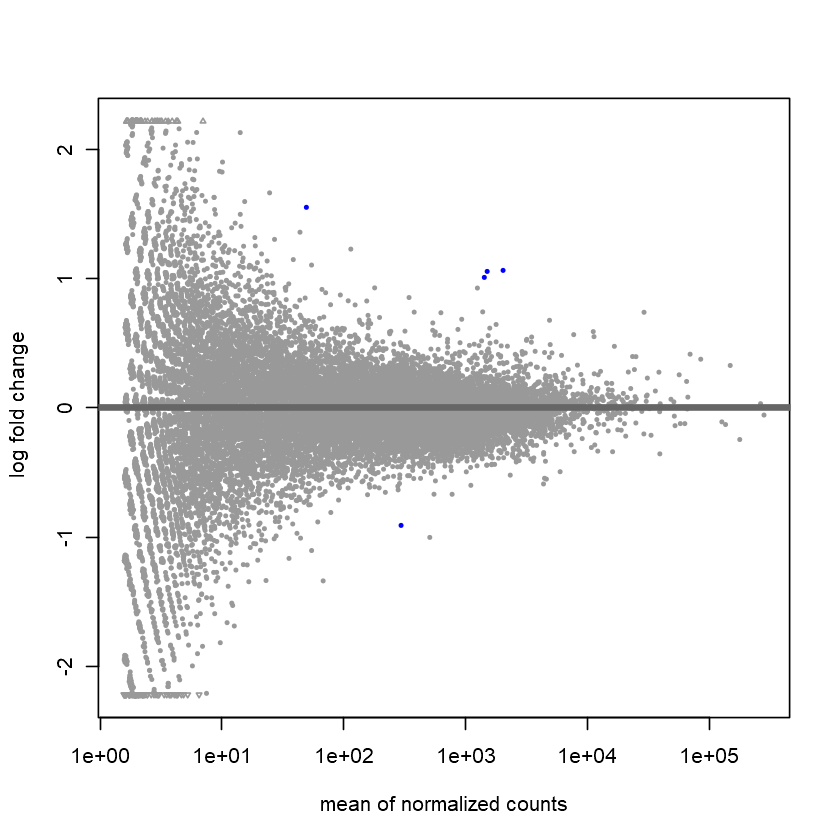

In [15]:
# MA plot
plotMA(res)

In [16]:
normCount <- read.csv("normal_Lactobacillus_acidophilus_KLDS1.0901.csv", row.names = 1)
deSeqRes <- read.csv("deseq_Lactobacillus_acidophilus_KLDS1.0901.csv.csv", row.names = 1)
deSeqRes$sig <- ifelse(deSeqRes$padj <= 0.05, "yes", "no")
deSeqRes <- na.omit(deSeqRes)
deSeqRes

baseMean     log2FoldChange lfcSE     stat         pvalue      
ALDH1A3      1501.750733   1.05768131    0.1488304  7.10662364  1.189161e-12
CXCL8          49.297368   1.55422871    0.3196225  4.86270057  1.157949e-06
EGR1         1423.101739   1.01138643    0.2124602  4.76035768  1.932502e-06
SLC12A3      2028.341791   1.06583138    0.2332973  4.56855494  4.910983e-06
TEKTIP1       295.116715  -0.90908447    0.2034170 -4.46906834  7.856103e-06
CCN1         1380.351096   0.74422453    0.1722148  4.32149079  1.549785e-05
CP             43.691997   1.36144560    0.3400000  4.00425148  6.221415e-05
SEMA5B        114.145823   1.23040984    0.3418252  3.59952982  3.187931e-04
WSB1          928.223904   0.68697803    0.1897413  3.62060346  2.939167e-04
EFEMP2         24.601286   1.66632725    0.4690967  3.55220397  3.820186e-04
CCL20          14.120156   2.13282453    0.6081339  3.50716269  4.529121e-04
EIF4A2       3480.829119   0.54964583    0.1569744  3.50150063  4.626459e-04
IVNS1ABP     1777.936634   0.64695948    0.1873198  3.45376998  5.528087e-04
WASH7P        140.271880  -0.09291409    0.2417110 -0.38440151  7.006809e-01
LOC124900384   10.750466   0.41061230    0.6447395  0.63686544  5.242125e-01
LOC729737      38.011018  -0.40882324    0.3436588 -1.18961961  2.341959e-01
LOC124903814    9.348686   0.49814777    0.6189259  0.80485843  4.209014e-01
WASH9P         99.912812  -0.01027974    0.2587068 -0.03973511  9.683043e-01
LOC127239154    7.429792  -1.30711686    0.7609634 -1.71771311  8.584896e-02
LOC112268260   25.210401   0.25094453    0.4335126  0.57886330  5.626814e-01
LOC100132287   17.930141  -0.48797518    0.5250264 -0.92942988  3.526664e-01
LOC105378947    7.020586   1.32669554    0.7544784  1.75842739  7.867482e-02
MIR12136     3120.141801  -0.03482809    0.2519889 -0.13821282  8.900722e-01
LOC100288069   70.224722  -0.13000975    0.3705933 -0.35081514  7.257270e-01
LINC01409      11.598895   0.11179387    0.5670057  0.19716533  8.436982e-01
LOC124903817   12.015854  -0.47132654    0.5999232 -0.78564481  4.320756e-01
FAM87B          2.798050  -0.15996769    1.0785230 -0.14832108  8.820894e-01
LINC00115      15.161440  -0.33148959    0.5867643 -0.56494506  5.721111e-01
LINC01128     263.413552  -0.30209806    0.2379833 -1.26940884  2.042953e-01
LOC284600      76.710001   0.18841840    0.2818949  0.66839954  5.038786e-01
...          ...          ...            ...       ...          ...         
RDH13_8      5.439662e+00 -0.5984191690  0.7842801 -0.763017127 0.44545318  
NDUFA3_9     3.773478e+01  0.2665442483  0.4178137  0.637949985 0.52350624  
TFPT_9       1.580706e+01  0.2872990727  0.4910505  0.585070324 0.55850043  
LOC124905653 5.274907e+00 -0.1422892154  0.8453340 -0.168323075 0.86632912  
PRPF31_9     6.347732e+01  0.1082447669  0.2944861  0.367571732 0.71319260  
CNOT3_9      1.282690e+02 -0.0653285106  0.2167535 -0.301395374 0.76311302  
LENG1_9      3.812290e+01  0.0001275085  0.3490592  0.000365292 0.99970854  
TMC4_9       9.637315e+00 -0.3809267203  0.5999342 -0.634947551 0.52546262  
MBOAT7_9     4.264709e+02 -0.1387418243  0.2204241 -0.629431237 0.52906677  
TSEN34_9     3.622922e+02  0.1264344484  0.2910253  0.434444915 0.66396539  
RPS9_9       2.261003e+03  0.0506423562  0.2918887  0.173498888 0.86225930  
LENG8-AS1_3  5.728203e+00  0.1183574799  0.7886184  0.150082071 0.88069987  
LENG8_3      9.643159e+01  0.1723131545  0.3487153  0.494137075 0.62120938  
LENG9_3      2.792153e+01 -0.0552768570  0.4176907 -0.132339209 0.89471600  
RNR1         2.498450e+04  0.3976755843  0.1767892  2.249434027 0.02448490  
RNR2         2.810077e+05 -0.0545959576  0.1473832 -0.370435307 0.71105817  
ND1          6.589638e+04 -0.0071982914  0.1497117 -0.048081017 0.96165167  
ND2          5.781567e+04 -0.1209205309  0.1458121 -0.829290316 0.40694015  
COX1         2.633450e+05  0.0334025547  0.1464111  0.228142250 0.81953566  
COX2         1.777490e+05 -0.2440525387  0.1377408 -1.771825115 0.07642359  
ATP8     

Gráfico de dispersión de log2FoldChange vs. log1O(baseMean):

Este gráfico te permite visualizar la relación entre la expresión media de los genes (log1O(baseMean)) y la diferencia de expresión entre condiciones (log2FoldChange). Los genes con una mayor diferencia de expresión y una mayor expresión media son más probables de ser importantes.

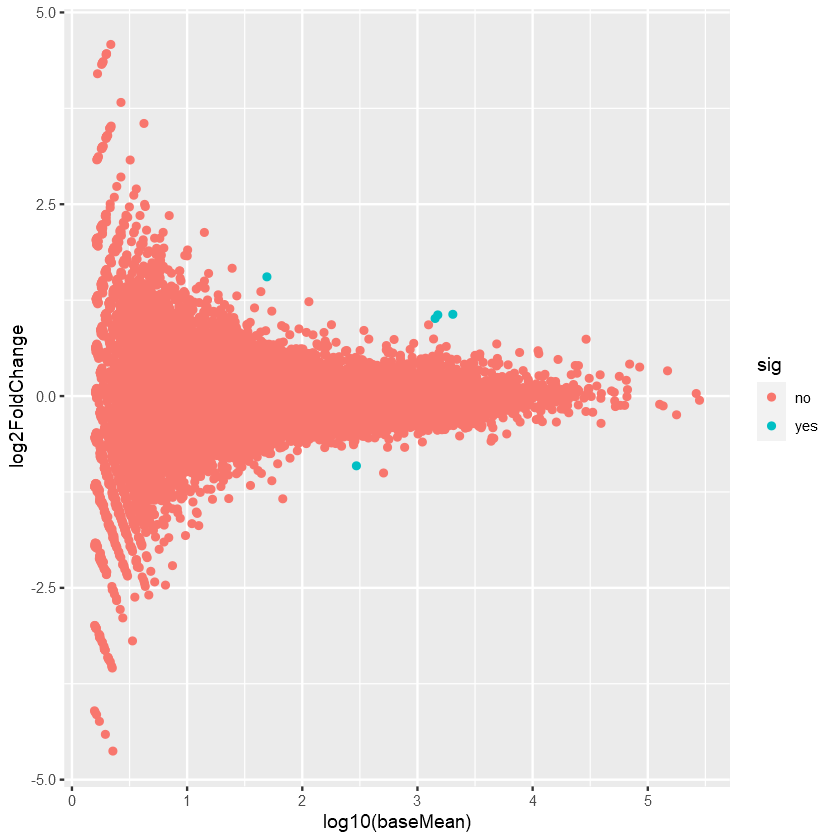

In [17]:
#Gráfico PlotMa
ggplot(deSeqRes, aes(x = log10(baseMean), y = log2FoldChange, color = sig)) + geom_point()

Gráfico de dispersión de log2FoldChange vs. p-value:

Este gráfico te permite visualizar la relación entre la diferencia de expresión y el nivel de significación (p-value). Los genes con una mayor diferencia de expresión y un p-value más bajo son más probables de ser importantes.

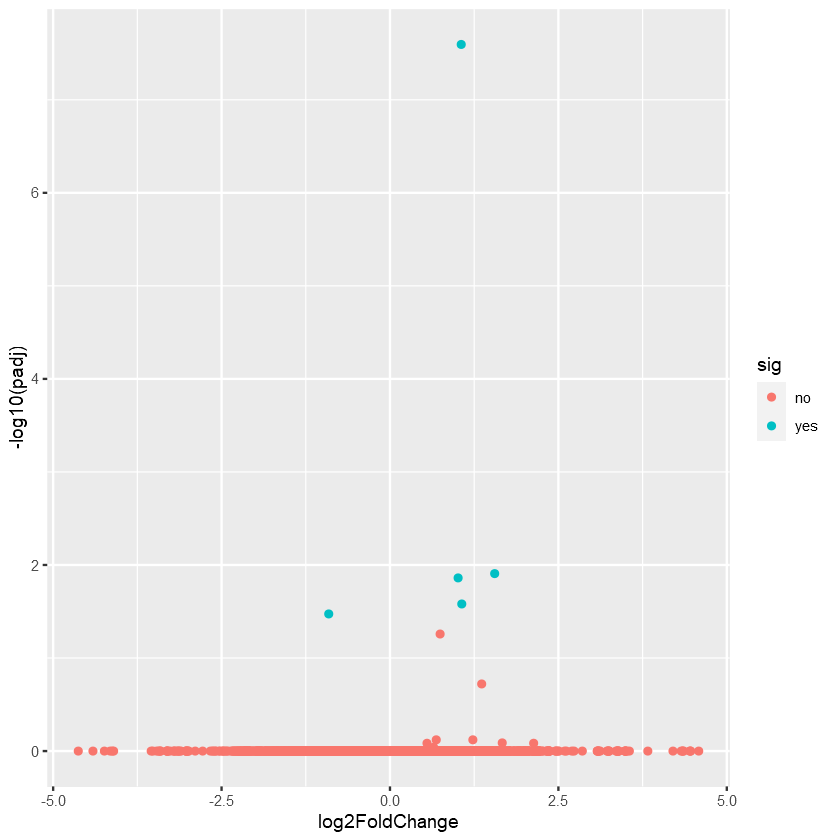

In [18]:
#volcano plot
ggplot(deSeqRes, aes(x = log2FoldChange, y = -log10(padj), color = sig)) + geom_point()

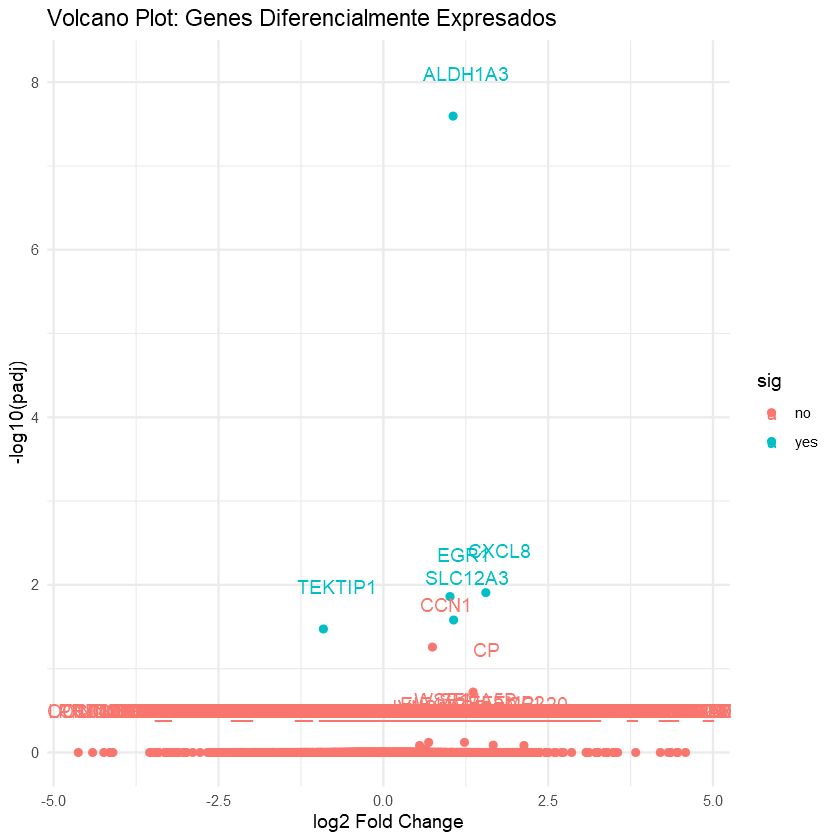

In [19]:
# Crea el gráfico de volcán con etiquetas de genes

ggplot(deSeqRes, aes(x = log2FoldChange, y = -log10(padj), color = sig)) +
  geom_point() +
  geom_text(aes(label = rownames(deSeqRes)), nudge_x = 0.2, nudge_y = 0.5) +  # Agrega las etiquetas
  labs(x = "log2 Fold Change", y = "-log10(padj)", title = "Volcano Plot: Genes Diferencialmente Expresados") +
  theme_minimal()

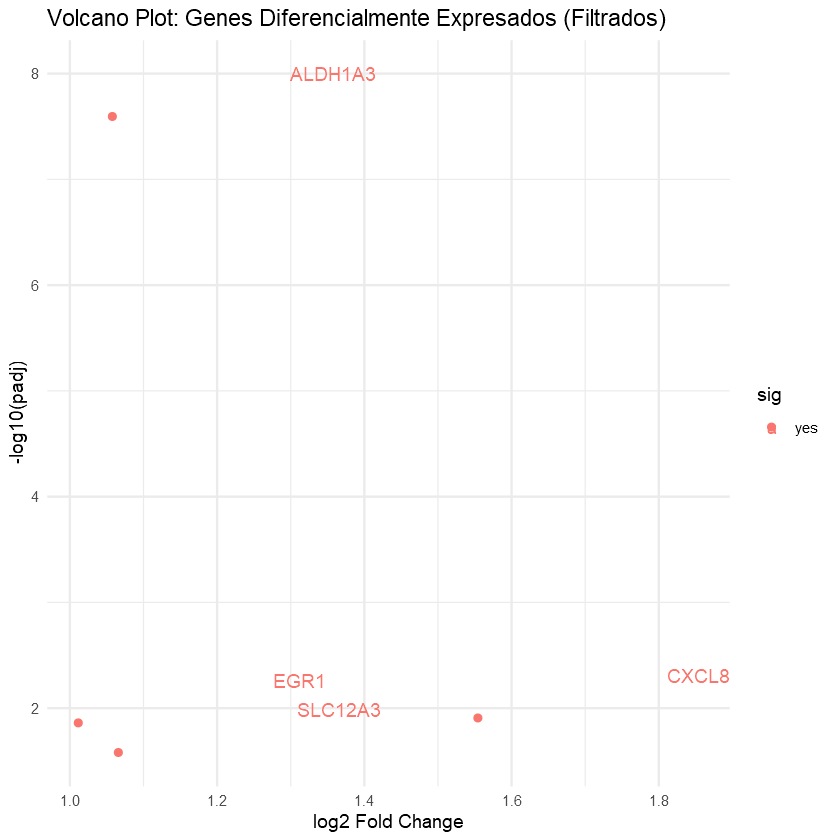

In [20]:
library(dplyr)
# Filtra los datos para incluir solo los genes significativos
umbral_pvalor <- 0.05
umbral_foldchange <- 2  # Por ejemplo, considera genes con un cambio de plegamiento mayor a 2

# Agrega una columna con los nombres de los genes
deSeqRes$gene_name <- row.names(deSeqRes)
deSeqRes_filtrado <- deSeqRes %>%
  filter(padj <= umbral_pvalor, abs(log2FoldChange) >= log2(umbral_foldchange))

# Crea el gráfico de volcán con los datos filtrados
library(ggplot2)
ggplot(deSeqRes_filtrado, aes(x = log2FoldChange, y = -log10(padj), color = sig)) +
  geom_point() +
  geom_text(aes(label = gene_name), nudge_x = 0.3, nudge_y = 0.4) +
  labs(x = "log2 Fold Change", y = "-log10(padj)", title = "Volcano Plot: Genes Diferencialmente Expresados (Filtrados)") +
  theme_minimal()
write.csv(deSeqRes_filtrado, "deSeqRes_filtrado_Lactobacillus_acidophilus_KLDS1.0901.csv")

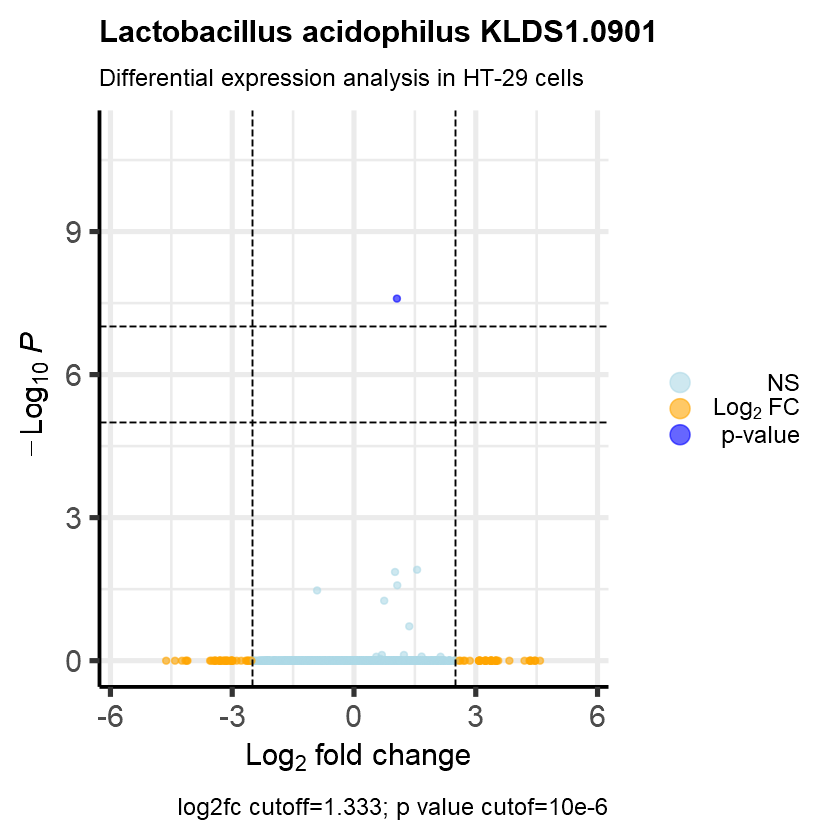

In [27]:
# Crear volcanoplot de grado de publicación con genes de interés marcados
EnhancedVolcano(res,
                lab = rownames(res),
                x = 'log2FoldChange',
                y = 'padj',
                pCutoff = 10e-6,
                FCcutoff = 2.5,
                xlim = c(-5.7, 5.7),
                ylim = c(0, -log10(10.2e-12)),
                pointSize = 1.3,
                labSize = 2.6,
                title = 'Lactobacillus acidophilus KLDS1.0901',
                subtitle = 'Differential expression analysis in HT-29 cells',
                caption = 'log2fc cutoff=1.333; p value cutof=10e-6',
                legendPosition = "right",
                legendLabSize = 14,
                col = c('lightblue', 'orange', 'blue', 'red2'),
                colAlpha = 0.6,
                drawConnectors = TRUE,
                hline = c(10e-8),
                widthConnectors = 0.5)

PCA Plot

Propósito: Realiza un análisis de componentes principales (PCA) para visualizar la variabilidad de los datos de expresión génica entre las muestras.
plotPCA(rld, intgroup='condition'):
rld: El objeto con los datos transformados.
intgroup='condition': Especifica el grupo de interés para el PCA, en este caso, las diferentes condiciones (condition) de las muestras.
geom_text(aes(label = name), size = 2.5): Añade etiquetas a los puntos en el gráfico PCA, con un tamaño de texto de 2.5. La estética aes(label = name) usa el nombre de las muestras como etiquetas.
ggtitle('PCA Plot'): Añade un título al gráfico PCA.

El gráfico de PCA permite visualizar la estructura de los datos y observar cómo se agrupan las muestras en función de su expresión génica. Las muestras con perfiles de expresión similares se agruparán cerca unas de otras en el gráfico. Esto es útil para:

Identificar patrones de agrupamiento: Ver si las muestras se agrupan de acuerdo con las condiciones experimentales, lo cual puede sugerir diferencias biológicas entre grupos.
Detectar muestras atípicas: Identificar muestras que no se agrupan con otras de su condición, lo cual podría indicar problemas técnicos o biológicos.
Explorar la variabilidad en los datos: Entender qué proporción de la variación total es explicada por los primeros componentes principales.

HT.29.cells.treatment.sample.3 HT.29.cells.treatment.sample.2
WASH7P       7.062437                       7.063826                      
LOC124900384 3.537223                       3.433580                      
LOC729737    5.195227                       5.233964                      
LOC124903814 3.257637                       3.237897                      
WASH9P       6.668148                       6.567815                      
LOC127239154 2.862038                       2.778204                      
             HT.29.cells.treatment.sample.1 HT.29.cells.control.sample.3
WASH7P       7.188693                       7.012431                    
LOC124900384 3.309900                       3.400971                    
LOC729737    5.119692                       5.378231                    
LOC124903814 3.248494                       3.222968                    
WASH9P       6.668531                       6.682749                    
LOC127239154 2.813165                       2.985755                    
             HT.29.cells.control.sample.2 HT.29.cells.control.sample.1
WASH7P       7.177895                     7.239786                    
LOC124900384 3.335683                     3.408083                    
LOC729737    5.274100                     5.228717                    
LOC124903814 3.221592                     3.137229                    
WASH9P       6.505674                     6.720945                    
LOC127239154 2.954056                     2.839351

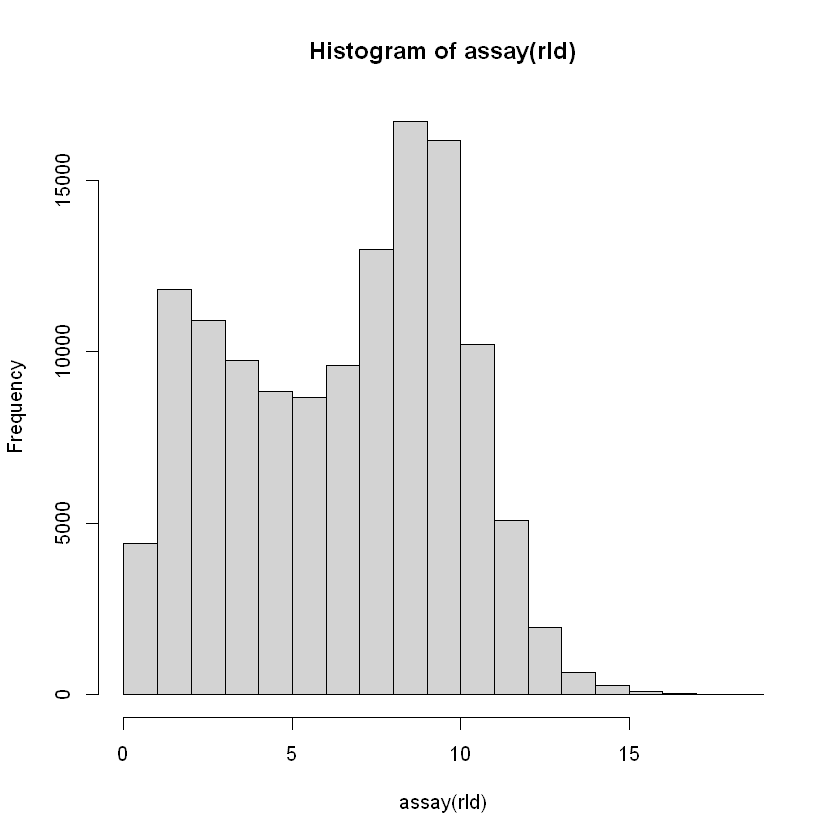

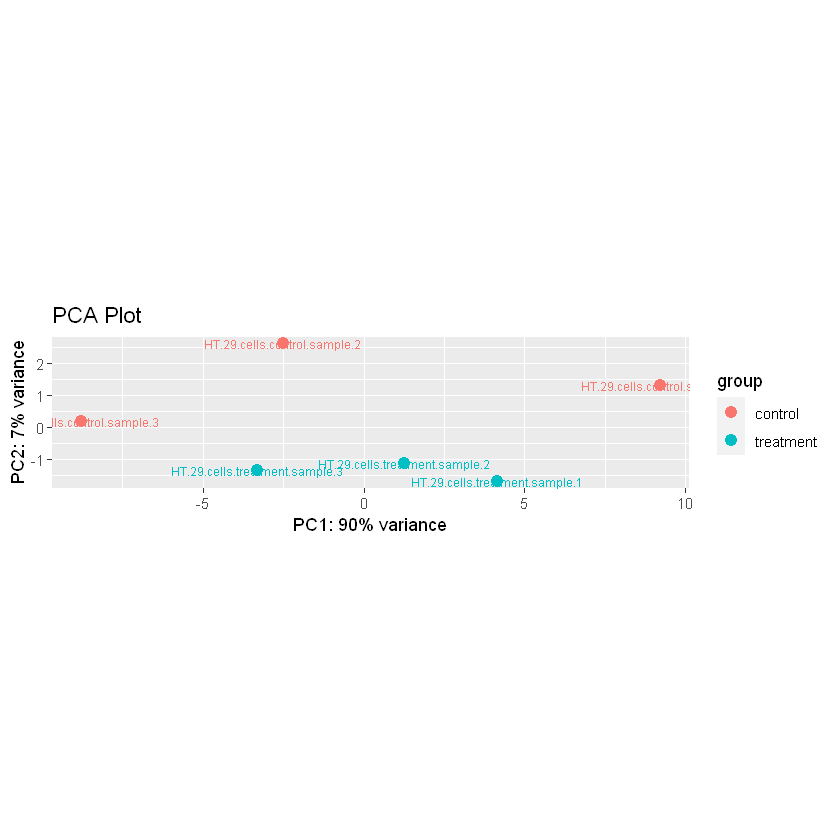

In [23]:
rld <- rlogTransformation(dds, blind = FALSE)
head(assay(rld))
hist(assay(rld))
PCAA <- plotPCA(rld, intgroup='condition')
PCAA + geom_text(aes(label = name),size = 2.5)+ggtitle('PCA Plot')

### Mapa de calor (heatmap) de los genes significativamente expresados

mapa de calor de los genes significativamente expresados, normalizando y transformando los datos de expresión para facilitar su visualización y comparación
- Filtrar los genes con expresión diferencial significativa.
- Combinar los datos normalizados con los genes significativos.
- Seleccionar las columnas relevantes y asignar nombres de filas.
- Generar y personalizar un mapa de calor para visualizar la expresión génica.

Este heatmap ayuda a visualizar y explorar los patrones de expresión de los genes significativamente diferenciados, permitiendo identificar grupos de genes que pueden estar coexpresados o que presentan patrones de expresión similares bajo diferentes condiciones experimentales. Es una herramienta útil para detectar patrones globales y potencialmente identificar genes o conjuntos de genes que podrían estar relacionados funcionalmente.

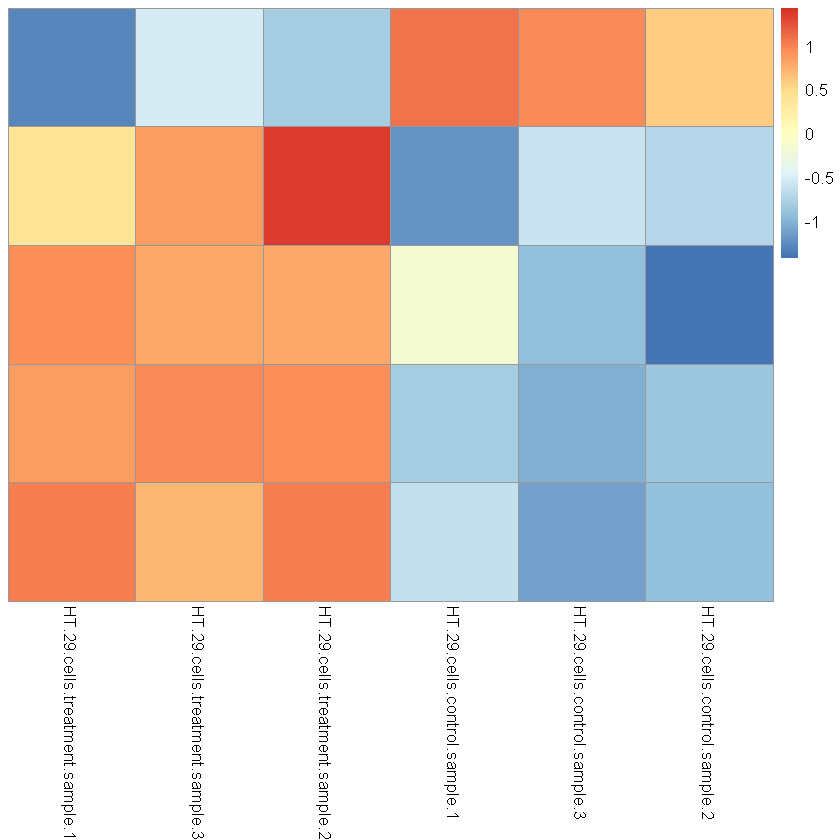

In [24]:
#pheatmap
signi <- subset(deSeqRes, padj <= 0.05)
allSig <- merge(normCount, signi, by = 0)
sigCounts <- allSig[,2:7]
row.names(sigCounts) <- allSig$Row.names
pheatmap(log2(sigCounts + 1), scale = 'row', show_rownames = F, treeheight_row = 0, treeheight_col = 0)



In [24]:
######################################################################################################################################

# Crear el marco de datos final que consiste en resultados deseq ordenados basados en log2fc

# Create the final dataframe consisting of ordered DESeq results based on log2FoldChange
resord = as.data.frame(res)
finaltable = cbind(rownames(res), resord)
finaltable = finaltable[order(finaltable$log2FoldChange), ]
write.table(finaltable, file = 'finaltable_ori.csv', sep = ',', col.names = NA)

# Filtrar genes con cambios de expresión significativos (positivos o negativos)
# Usamos el criterio p-value ajustado < 10e-7 y log2FoldChange ≥ 2.5 o ≤ -2.5
significativos <- resord[which(resord$padj < 0.05 & (resord$log2FoldChange >= 1 | resord$log2FoldChange <= -1)), ]

# Asegurarse de que los nombres de los genes estén alineados con las filas de resultados significativos
# Filtramos solo aquellos genes que están en `significativos`
significativos_table <- significativos
significativos_table$Gene.Name <- rownames(significativos)

# Renombrar la columna de los nombres de los genes para mayor claridad
colnames(significativos_table)[ncol(significativos_table)] <- "Gene.Name"

# Guardar el archivo CSV con los genes significativos
write.table(significativos_table, file = 'significativo.csv', sep = ',', row.names = FALSE, col.names = TRUE)

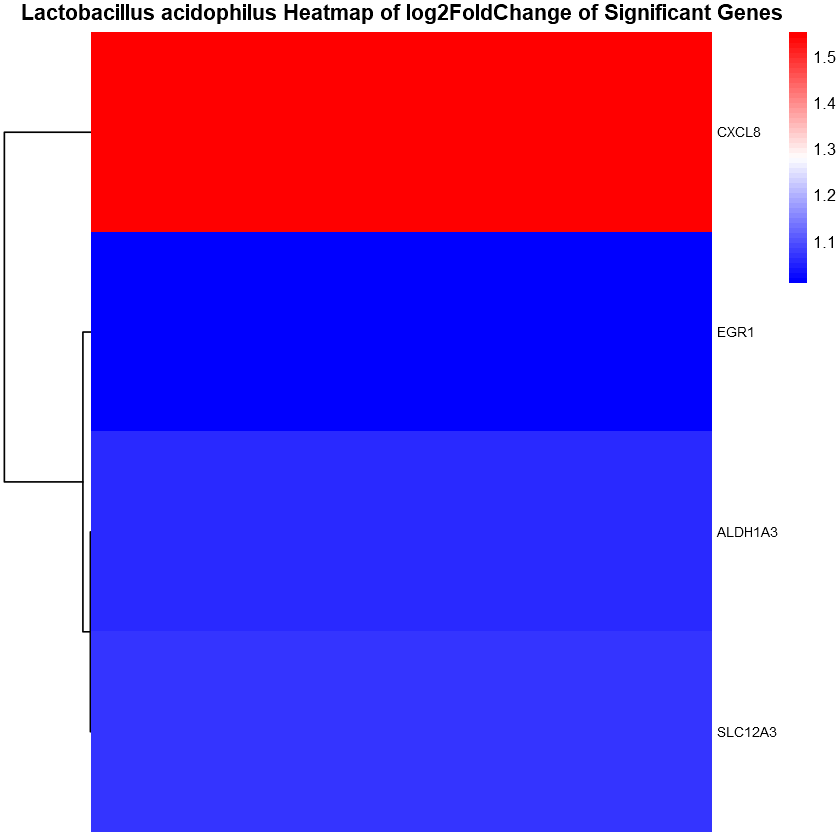

In [26]:
# heatmap
# Cargar la tabla de genes significativos (assume that this is the filtered data)
significativos_table <- read.csv('significativo.csv')

# Seleccionar las columnas que nos interesan (Gene.Name, log2FoldChange)
# Asumiendo que log2FoldChange está en la columna log2FoldChange
gene_log2FC <- data.frame(Gene.Name = significativos_table$Gene.Name, log2FoldChange = significativos_table$log2FoldChange)

# Usamos los valores de log2FoldChange como una matriz para el heatmap
# Como no tenemos múltiples muestras, el heatmap será unidimensional basado en los valores de log2FoldChange

# Crear una matriz con Gene.Name como filas y log2FoldChange como valores
matriz_log2FC <- as.matrix(gene_log2FC$log2FoldChange)
rownames(matriz_log2FC) <- gene_log2FC$Gene.Name

# Crear el heatmap usando pheatmap
pheatmap(matriz_log2FC,
         color = colorRampPalette(c("blue", "white", "red"))(50),  # Colores desde azul (bajo) a rojo (alto)
         border_color = NA,  # Sin bordes entre celdas
         cluster_cols = FALSE,  # No agrupar columnas, ya que solo hay una
         cluster_rows = TRUE,  # Agrupar filas (genes)
         main = "Lactobacillus acidophilus Heatmap of log2FoldChange of Significant Genes",
         fontsize_row = 8,  # Tamaño de la fuente para los nombres de los genes
         show_colnames = FALSE  # Ocultar los nombres de columnas
)